In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import importlib

def import_or_install(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed")
    except ImportError:
        print(f"{package} is not installed. Installing {package}...")
        !pip install {package}
        print(f"{package} has been installed")
import_or_install('pycaret')

from pycaret.regression import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pycaret is not installed. Installing pycaret...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 18.8 MB/s eta 0:00:00
  Using cac

In [2]:
# Import dataset
df_pre = pd.read_csv('/kaggle/input/student-performance-in-mathematics/exams.csv')
df_pre

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


# Exploratory Data Analysis (EDA)

In [3]:
# Check the shape of the dataframe
df_pre.shape

(1000, 8)

In [4]:
# Find the variance and standard deviation of each score
df_pre[['math score', 'reading score', 'writing score']].agg(['var', 'std'])

,math score,reading score,writing score
var,232.568468,199.019095,225.778178
std,15.250196,14.107413,15.025917


We observe that math score has the highest variance among the math, reading and writing scores.

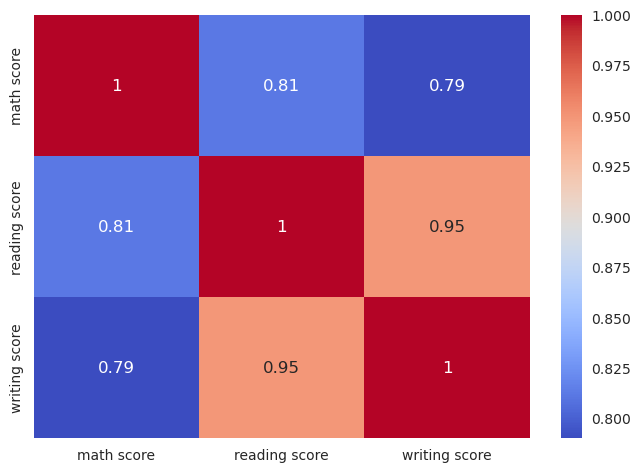

In [5]:
# Calculate the correlation matrix
correlation_matrix = df_pre.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

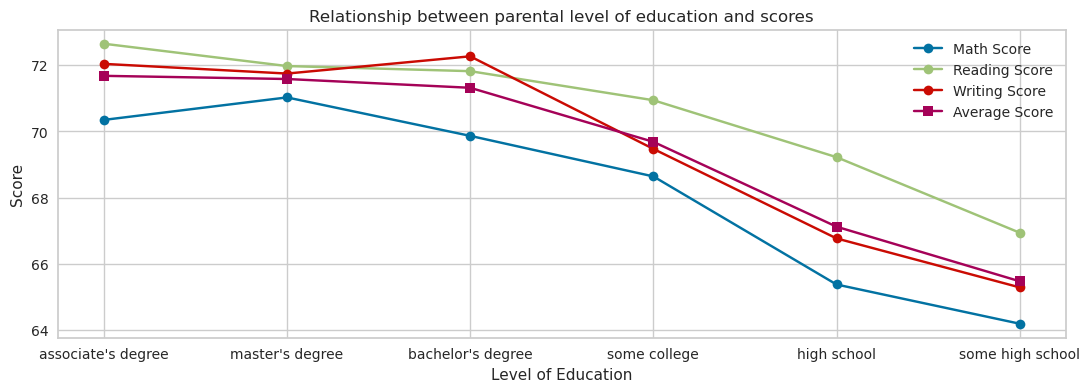

In [6]:
# Create a dataframe that calculates the mean of each score in the group of parental level of education
education_score = df_pre.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
education_score['average score'] = (education_score['math score']+education_score['reading score']+education_score['writing score'])/3
education_score = education_score.sort_values('average score', ascending=False)

# Create plot to find the relationship between parental level of education and scores
plt.figure(figsize=(13,4))
plt.plot(education_score['parental level of education'], education_score['math score'], marker='o', label='Math Score')
plt.plot(education_score['parental level of education'], education_score['reading score'], marker='o', label='Reading Score')
plt.plot(education_score['parental level of education'], education_score['writing score'], marker='o', label='Writing Score')
plt.plot(education_score['parental level of education'], education_score['average score'], marker='s', label='Average Score')

# Add labels and title
plt.title('Relationship between parental level of education and scores')
plt.xlabel('Level of Education')
plt.ylabel('Score')

# Show the plot
plt.legend()
plt.show()

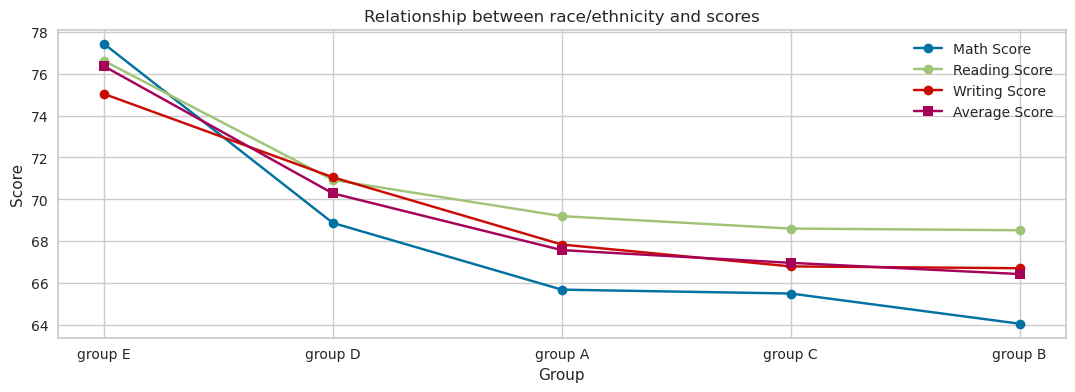

In [7]:
# Create a dataframe that calculates the mean of each score in the group of race/ethnicity
race_score = df_pre.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().reset_index()
race_score['average score'] = (race_score['math score']+race_score['reading score']+race_score['writing score'])/3
race_score = race_score.sort_values('average score', ascending=False)

# Create plot to find the relationship between race/ethnicity and scores
plt.figure(figsize=(13,4))
plt.plot(race_score['race/ethnicity'], race_score['math score'], marker='o', label='Math Score')
plt.plot(race_score['race/ethnicity'], race_score['reading score'], marker='o', label='Reading Score')
plt.plot(race_score['race/ethnicity'], race_score['writing score'], marker='o', label='Writing Score')
plt.plot(race_score['race/ethnicity'], race_score['average score'], marker='s', label='Average Score')

# Add labels and title
plt.title('Relationship between race/ethnicity and scores')
plt.xlabel('Group')
plt.ylabel('Score')

# Show the plot
plt.legend()
plt.show()

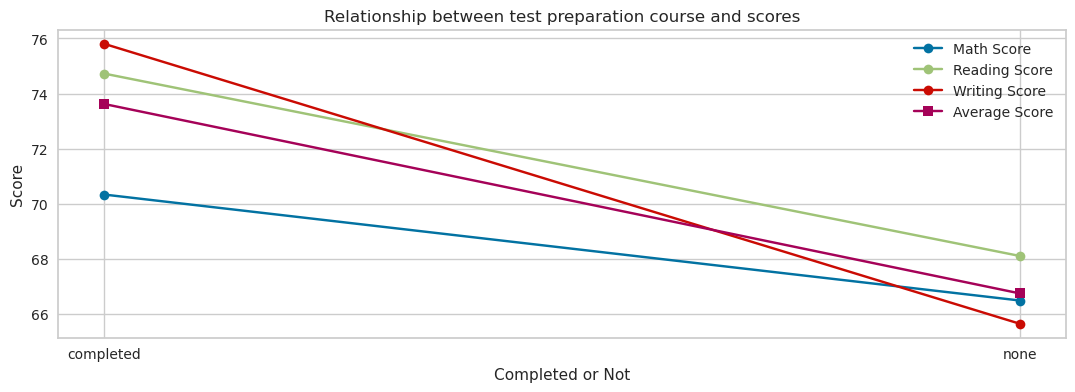

In [8]:
# Create a dataframe that calculates the mean of each score in the group of test preparation course
prep_score = df_pre.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()
prep_score['average score'] = (prep_score['math score']+prep_score['reading score']+prep_score['writing score'])/3
prep_score = prep_score.sort_values('average score', ascending=False)

# Create plot to find the relationship between test preparation course and scores
plt.figure(figsize=(13,4))
plt.plot(prep_score['test preparation course'], prep_score['math score'], marker='o', label='Math Score')
plt.plot(prep_score['test preparation course'], prep_score['reading score'], marker='o', label='Reading Score')
plt.plot(prep_score['test preparation course'], prep_score['writing score'], marker='o', label='Writing Score')
plt.plot(prep_score['test preparation course'], prep_score['average score'], marker='s', label='Average Score')

# Add labels and title
plt.title('Relationship between test preparation course and scores')
plt.xlabel('Completed or Not')
plt.ylabel('Score')

# Show the plot
plt.legend()
plt.show()

In [9]:
# Calculate the variance and standard deviation of scores based on whether the students completed the test prepration course
df_pre.groupby('test preparation course')[['math score', 'reading score', 'writing score']].agg(['var', 'std'])

math score            reading score             \
                                var        std           var        std   
test preparation course                                                   
completed                215.902493  14.693621    170.735609  13.066584   
none                     236.549430  15.380164    199.021300  14.107491   

                        writing score             
                                  var        std  
test preparation course                           
completed                  180.353753  13.429585  
none                       214.312260  14.639408

Generally, students who completed the test preparation course have the lower variance than those who did not.

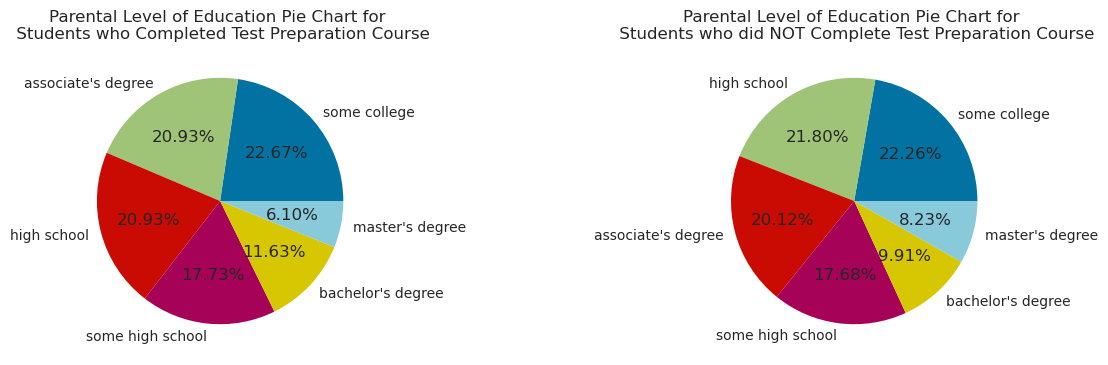

In [10]:
# Create a dataframe that counts the number of students when grouping by parental level of education and test preparation course
par_test_count = df_pre[['parental level of education', 'test preparation course']].value_counts().to_frame().reset_index().rename(columns={0:'Count'}).sort_values('Count', ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

# Create the first pie chart for the count of students who completed the test preparation course
ax1.pie(par_test_count[par_test_count['test preparation course']=='completed']['Count'], 
        labels=par_test_count[par_test_count['test preparation course']=='completed']['parental level of education'],
        autopct='%1.2f%%')
ax1.set_title('Parental Level of Education Pie Chart for \n Students who Completed Test Preparation Course')

# Create the second pie chart for the count of students who did not complete the test preparation course
ax2.pie(par_test_count[par_test_count['test preparation course']=='none']['Count'], 
        labels=par_test_count[par_test_count['test preparation course']=='none']['parental level of education'],
        autopct='%1.2f%%')
ax2.set_title('Parental Level of Education Pie Chart for \n Students who did NOT Complete Test Preparation Course')

# Show the plot
plt.show()

In [11]:
# Let's check the performance of students based on gender
df_pre.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,64.77439,73.473577,73.439024
male,70.75000,67.387795,64.976378


Basically male students have an advantage in math, while female students are good at reading and writing.

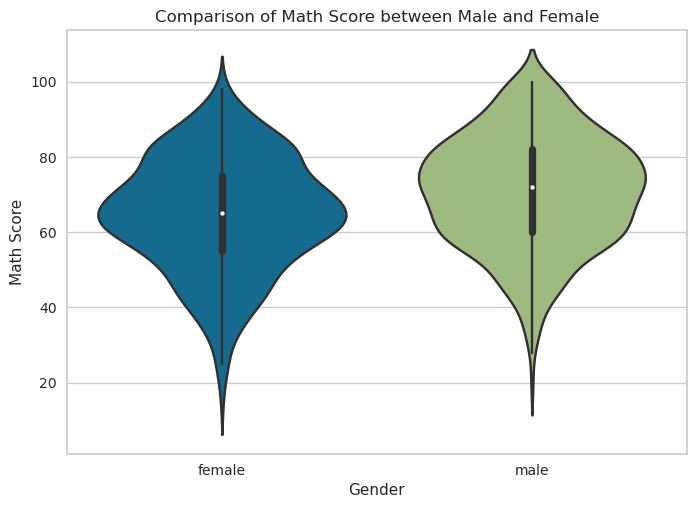

In [12]:
# Create a violin plot for math score based on gender
sns.violinplot(x='gender', y='math score', data=df_pre)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Comparison of Math Score between Male and Female')

# Show the plot
plt.show()

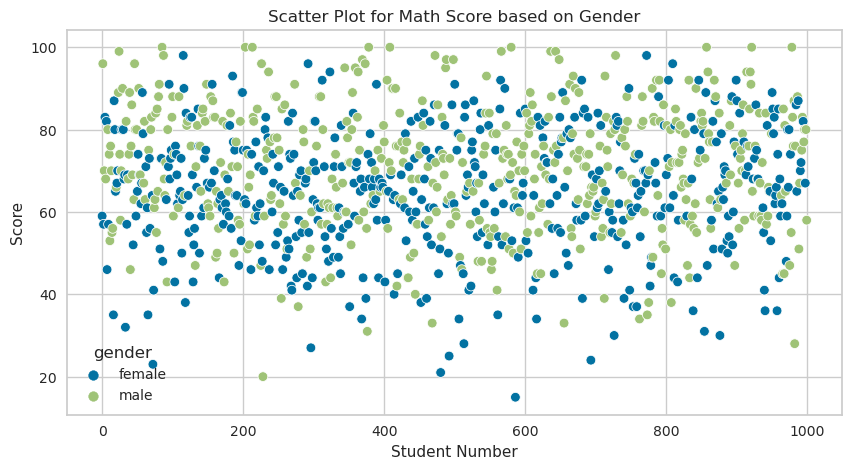

In [13]:
# Create scatter plot of math score based on gender
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(0, len(df_pre)), y="math score", hue="gender", data=df_pre)

# Add labels and title
plt.title('Scatter Plot for Math Score based on Gender')
plt.xlabel('Student Number')
plt.ylabel('Score')

# Show the plot
plt.show()

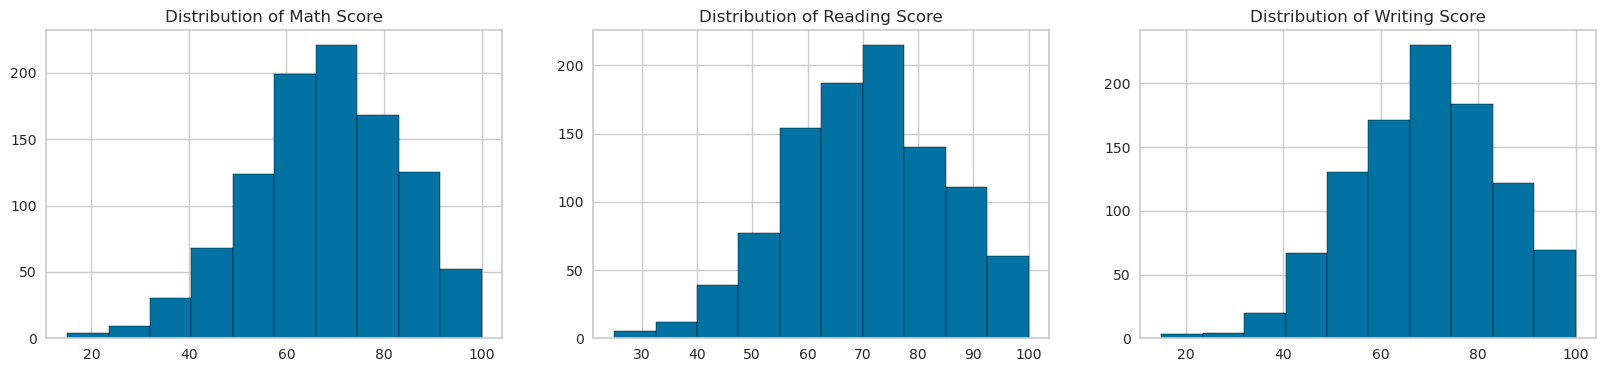

In [14]:
# Create subplots to show the distribution of each score
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# Plot for math
ax1.set_title('Distribution of Math Score')
ax1.hist(df_pre['math score'], edgecolor='black')

# Plot for reading
ax2.set_title('Distribution of Reading Score')
ax2.hist(df_pre['reading score'], edgecolor='black')

# Plot for writing
ax3.hist(df_pre['writing score'], edgecolor='black')
ax3.set_title('Distribution of Writing Score')

# Show plots
plt.show()

# Data Processing

In [15]:
# One-hot encoding the categorical variables
df = pd.get_dummies(df_pre)
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,59,70,78,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,96,93,87,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,57,76,77,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,70,70,63,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,83,85,86,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,77,77,71,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
996,80,66,66,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
997,67,86,86,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
998,80,72,62,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [16]:
# Get a summary of the dataframe
df.describe()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000,0.492000,0.508000,0.079000,0.198000,0.323000,0.257000,0.143000,0.204000,0.105000,0.215000,0.075000,0.224000,0.17700,0.340000,0.660000,0.344000,0.656000
std,15.250196,14.107413,15.025917,0.500186,0.500186,0.269874,0.398692,0.467857,0.437198,0.350248,0.403171,0.306707,0.411028,0.263523,0.417131,0.38186,0.473946,0.473946,0.475279,0.475279
min,15.000000,25.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,61.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,70.500000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
75%,79.250000,80.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Check if there are any missing values
df.isna().any()

math score                                        False
reading score                                     False
writing score                                     False
gender_female                                     False
gender_male                                       False
race/ethnicity_group A                            False
race/ethnicity_group B                            False
race/ethnicity_group C                            False
race/ethnicity_group D                            False
race/ethnicity_group E                            False
parental level of education_associate's degree    False
parental level of education_bachelor's degree     False
parental level of education_high school           False
parental level of education_master's degree       False
parental level of education_some college          False
parental level of education_some high school      False
lunch_free/reduced                                False
lunch_standard                                  

# Model

In [18]:
# Assign variables
X = df.drop('math score', axis=1)
y = df['math score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

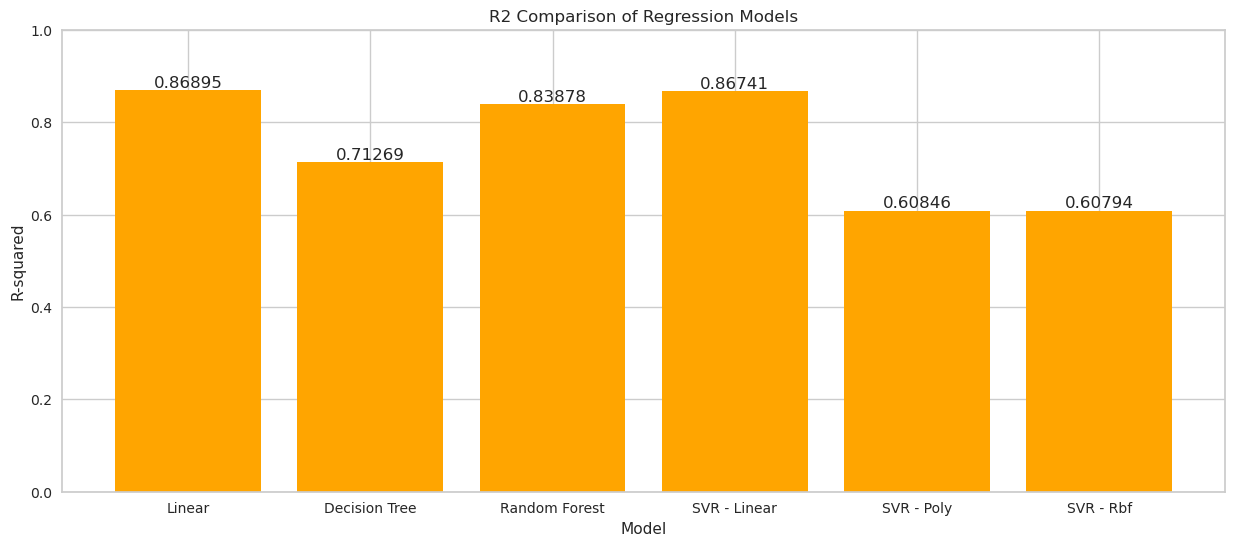

In [19]:
# Create a list of regression models to compare, selecting the best one
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf')]

# Use cross-validation to compute the R-squared score for each model
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    cv_scores.append(scores.mean())

# Plot the results
fig, ax = plt.subplots(figsize=(15, 6))
rects = ax.bar(['Linear', 'Decision Tree', 'Random Forest', 'SVR - Linear', 'SVR - Poly', 'SVR - Rbf'], cv_scores, color='orange')
ax.set_ylim(0, 1)
ax.set_title('R2 Comparison of Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')

# Add labels above each bar
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, f'{height:.5f}', ha='center', va='bottom')

# Show the plot
plt.show()


From above graph, the linear regression model gives us a higher R2 score. So we will use linear regression for our model.

In [20]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Evaluation Metrics')
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared score:", r2)

Evaluation Metrics
Mean squared error: 28.38885289905445
Root Mean squared error: 5.328119077034075
Mean absolute error: 4.379877672766593
R-squared score: 0.8702740399180283


## Optional
using a more automatic way to compare different models

In [21]:
# initialize the setup
regression = setup(df, target='math score', train_size=0.6, normalize=False)

# compare models
compare_models()

# select the best model based on MAE
best_model = automl(optimize = 'MAE')
print(best_model)

,Description,Value
0,Session id,1862
1,Target,math score
2,Target type,Regression
3,Original data shape,"(1000, 20)"
4,Transformed data shape,"(1000, 20)"
5,Transformed train set shape,"(600, 20)"
6,Transformed test set shape,"(400, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,4.2999,28.5041,5.3302,0.8649,0.0863,0.0686,0.0380
ridge,Ridge Regression,4.3025,28.5260,5.3322,0.8647,0.0864,0.0686,0.0360
lr,Linear Regression,4.3041,28.5409,5.3335,0.8646,0.0864,0.0686,0.3240
huber,Huber Regressor,4.3333,28.8140,5.3591,0.8633,0.0869,0.0691,0.0540
gbr,Gradient Boosting Regressor,4.4576,30.7566,5.5388,0.8539,0.0895,0.0712,0.1330
catboost,CatBoost Regressor,4.5715,33.3123,5.7574,0.8416,0.0935,0.0731,1.2320
lightgbm,Light Gradient Boosting Machine,4.6907,35.4414,5.9292,0.8313,0.0966,0.0752,0.2690
rf,Random Forest Regressor,4.7313,35.5978,5.9492,0.8295,0.0959,0.0754,0.3330
et,Extra Trees Regressor,4.8324,37.0396,6.0632,0.8224,0.0987,0.0772,0.2860
lar,Least Angle Regression,4.9032,38.5399,6.0594,0.8223,0.0973,0.0782,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

BayesianRidge()
